# Ask if we even need to do this.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (6, 6)

In [5]:
wine = (pd
             .read_csv("../Projects/wineQualityReds.csv")
             .rename(columns={
    "Unnamed: 0" : "id",
    "fixed.acidity" : "fixed_acidity",
    "volatile.acidity" : "volatile_acidity",
    "citric.acid" : "citric_acid",
    "residual.sugar" : "residual_sugar",
    "free.sulfur.dioxide" : "free_sulfur_dioxide",
    "total.sulfur.dioxide" : "total_sulfur_dioxide",
    "sulphates" : "sulfates",
})
            .query("pH>0")
)

In [6]:
wine.head()

,id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.shape

(1599, 13)

In [8]:
wine = wine.drop_duplicates()

In [9]:
wine.shape

(1599, 13)

In [10]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[column])) > 3])    
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(wine)

id | 0 | int64
fixed_acidity | 12 | float64
volatile_acidity | 10 | float64
citric_acid | 1 | float64
residual_sugar | 30 | float64
chlorides | 31 | float64
free_sulfur_dioxide | 22 | float64
total_sulfur_dioxide | 15 | float64
density | 18 | float64
pH | 8 | float64
sulfates | 27 | float64
alcohol | 8 | float64
quality | 10 | int64


In [16]:
wine.describe()

,id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality
count,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000
mean,812.624564,8.312491,0.527034,0.260998,2.277879,0.079431,15.613747,44.613398,0.996634,3.319826,0.637976,10.446115,5.641312
std,458.502868,1.750999,0.178843,0.191143,0.612018,0.016364,9.789847,30.166060,0.001829,0.152050,0.125332,1.058491,0.797007
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,421.000000,7.100000,0.390000,0.090000,1.900000,0.070000,8.000000,22.000000,0.995510,3.220000,0.550000,9.500000,5.000000
50%,819.000000,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,37.000000,0.996600,3.320000,0.620000,10.200000,6.000000
75%,1211.000000,9.200000,0.635000,0.420000,2.500000,0.088000,21.000000,60.000000,0.997740,3.410000,0.710000,11.100000,6.000000
max,1599.000000,15.600000,1.580000,0.790000,5.000000,0.147000,57.000000,165.000000,1.003200,4.010000,1.110000,14.000000,8.000000


In [17]:
chlorides_min = wine.chlorides.mean() - 3 * wine.chlorides.std()
chlorides_max = wine.chlorides.mean() + 3 * wine.chlorides.std()
print(chlorides_min, chlorides_max)

residual_sugar_min = wine.residual_sugar.mean() - 3*wine.residual_sugar.std()
residual_sugar_max = wine.residual_sugar.mean() + 3*wine.residual_sugar.std()
print(residual_sugar_min, residual_sugar_max)

sulfates_min = wine.sulfates.mean() - 3 * wine.sulfates.std()
sulfates_max = wine.sulfates.mean() + 3 * wine.sulfates.std()
print(sulfates_min, sulfates_max)

0.030337867065943325 0.12852465910293248
0.4418242467996554 4.113932906026584
0.2619809642945551 1.013971582809424


In [18]:
wine = wine[
    (np.abs(stats.zscore(wine.chlorides)) < 3) & \
    (np.abs(stats.zscore(wine.residual_sugar))< 3) & \
    (np.abs(stats.zscore(wine.sulfates))< 3)
]

In [19]:
wine.shape

(1380, 13)

Get help for the above

### Normalization and Standardization

In [21]:
wine.describe()

,id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality
count,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.00000,1380.000000,1380.000000,1380.000000
mean,815.777536,8.258623,0.526489,0.256862,2.229094,0.078886,15.667754,44.896377,0.996591,3.32221,0.634536,10.423176,5.644928
std,459.998645,1.693311,0.175829,0.189060,0.515661,0.015636,9.702871,30.184737,0.001789,0.15122,0.119810,1.048516,0.779549
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.86000,0.330000,8.400000,3.000000
25%,420.750000,7.100000,0.390000,0.087500,1.900000,0.069750,8.000000,23.000000,0.995500,3.22000,0.550000,9.500000,5.000000
50%,824.500000,7.900000,0.520000,0.240000,2.150000,0.078000,14.000000,37.000000,0.996600,3.32000,0.610000,10.100000,6.000000
75%,1213.250000,9.100000,0.635000,0.400000,2.500000,0.088000,21.000000,60.000000,0.997682,3.41000,0.710000,11.100000,6.000000
max,1599.000000,15.600000,1.330000,0.760000,4.100000,0.128000,57.000000,165.000000,1.003200,4.01000,1.010000,14.000000,8.000000


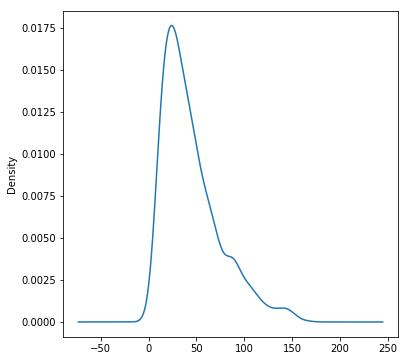

In [36]:
wine.total_sulfur_dioxide.plot.kde();

In [25]:
from scipy import stats

In [26]:
stats.skew(wine.total_sulfur_dioxide)

0.6404583191183592

#### Normalization

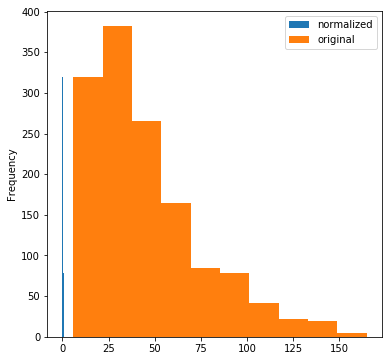

In [37]:
total_x_min = wine.total_sulfur_dioxide.min()
total_x_max = wine.total_sulfur_dioxide.max()

total_original = wine.total_sulfur_dioxide
total_normalized = total_original.apply(
    lambda x: (x-total_x_min) / (total_x_max - total_x_min))

total_normalized.plot.hist(label="normalized")
total_original.plot.hist(label="original")
plt.legend();

#### Standardization

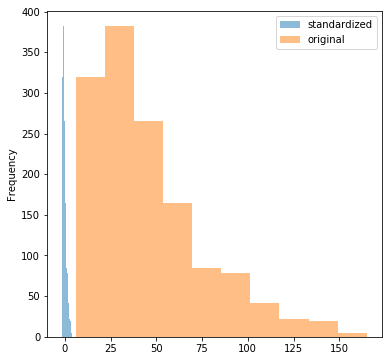

In [40]:
total_x_mu = wine.total_sulfur_dioxide.mean()
total_x_sigma = wine.total_sulfur_dioxide.std()

total_standardized = total_original.apply(lambda x: (x-total_x_mu) / total_x_sigma)

total_standardized.plot.hist(label="standardized", alpha=0.5)
total_original.plot.hist(label="original", alpha=0.5)
plt.legend();

In [42]:
original_pH = wine.pH

pH_mu = original_pH.mean()
pH_sigma = original_pH.std()
pH_min = original_pH.min()
pH_max = original_pH.max()

pH_standardized = original_pH.apply(lambda x: (x-pH_mu)/pH_sigma)
pH_normalized = original_pH.apply(lambda x: (x-pH_min)/(pH_max - pH_min))

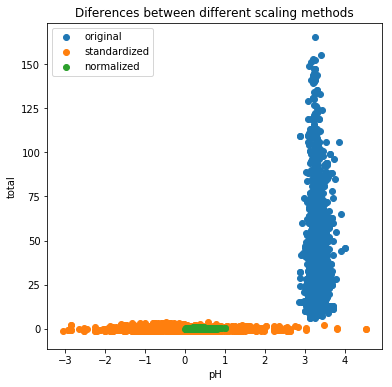

In [44]:
plt.scatter(x=original_pH,y=total_original, label="original")
plt.scatter(x=pH_standardized,y=total_standardized, label="standardized")
plt.scatter(x=pH_normalized,y=total_normalized, label="normalized")

plt.xlabel("pH")
plt.ylabel("total")
plt.title("Diferences between different scaling methods")
plt.legend();

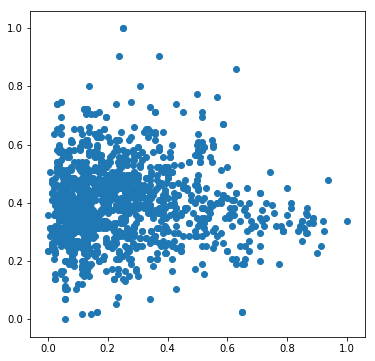

In [46]:
plt.scatter(x=total_normalized,y=pH_normalized, label="normalized");